# New Feature Tester for ML

In [11]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from workshop2_MPB import binPhaseLC
plt.ion()

## Part 1: Import YS data


In [100]:
dat = np.genfromtxt('/Users/mbattley/Documents/PhD/Python/young_star_machine_learning/young_star_merged_lcs_S1-5.txt')
freqs = np.genfromtxt('/Users/mbattley/Documents/PhD/Python/young_star_machine_learning/young_star_freqs_S1-5.txt')
mean_errs = np.genfromtxt('/Users/mbattley/Documents/PhD/Python/young_star_machine_learning/young_star_mean_errs_S1-5.txt')
timearray = np.linspace(0,27.3820561,1341)
test_flux = dat[10,:].copy()
test_flux = test_flux[~np.isnan(test_flux)]

In [101]:
test_flux

array([1.00317153, 1.00257576, 1.00332585, ..., 0.99959391, 0.99917141,
       0.99934168])

## Part 2:  Feature testing/generation

In [102]:
# p2p features
def p2p_features(test_flux):
    p2p = np.abs(np.diff(test_flux))
    return np.percentile(p2p,98),np.mean(p2p)

p2p_98, p2p_mean = p2p_features(test_flux)
print('Output: {} and {}'.format(p2p_98,p2p_mean))

Output: 0.0031278945127900873 and 0.0008533444594143736


In [103]:
# Amps
phasefold = True
offset = True
scale = True
bins = 32

output = np.ones([dat.shape[0],bins])
amps = np.zeros(dat.shape[0])
p2p_binned = np.ones([dat.shape[0],2])

for row in range(dat.shape[0]):
    flux = dat[row,:]
    if phasefold:
        period = 1./freqs[row,0]
        phase = np.mod(timearray,period)/period
    else:
        phase = timearray.copy()
            
    nancheck = np.isnan(flux)
        
    binnedlc = binPhaseLC(phase[~nancheck], flux[~nancheck], bins)
        
    if offset: #only valid for phasefolded lightcurves
        minimum = np.argmin(binnedlc[:,1])
        binnedlc[:,1] = np.roll(binnedlc[:,1],bins-minimum)
        
    amplitude = np.max(binnedlc[:,1]) - np.min(binnedlc[:,1])
        
    if scale:
        binnedlc[:,1] = (binnedlc[:,1]-np.min(binnedlc[:,1])) / amplitude
        
    output[row,:] = binnedlc[:,1]
    amps[row] = amplitude
    p2p_binned[row] = p2p_features(binnedlc[:,1])

In [106]:
# M-statistic
def find_M(flux,mean_err):
    sigma = mean_err
    rms = np.sqrt(np.mean(flux**2))
    #print('sigma = {}'.format(sigma))
    #print('rms = {}'.format(rms))
    M = np.sqrt(rms**2-sigma**2)
    return M

In [104]:
# std_over_err
# err = mean_point_error, the average of the individual point by point errors
std = np.std(test_flux)
err = mean_errs[row]

## Part x: Generate final feature set

In [107]:
features = np.zeros([dat.shape[0],13])

for row in range(dat.shape[0]):
    flux = dat[row,:].copy()
    flux = flux[~np.isnan(flux)]
    features[row,0:3] = freqs[row]
    features[row,3] = amps[row]
    features[row,4:6] = p2p_features(flux)
    features[row,6] = skew(flux)
    features[row,7] = kurtosis(flux)
    features[row,8] = find_M(flux,mean_errs[row])
    features[row,9] = np.std(flux)/mean_errs[row]
    features[row,10] = p2p_binned[row][0]
    features[row,11] = p2p_binned[row][1]
    features[row,12] = np.std(flux)
    """
    #INSERT MORE HERE
    """

feature_list = ['freq1','freq2','freq3','amp','p2p_98','p2p_mean','skew','kurtosis','M-stat','std_over_err',
                'phase_p2p_98','phase_p2p_mean','std']
#np.savetxt('final_feature_set_YS.txt',features)

## Part x2: Plot final feature distributions

<IPython.core.display.Javascript object>


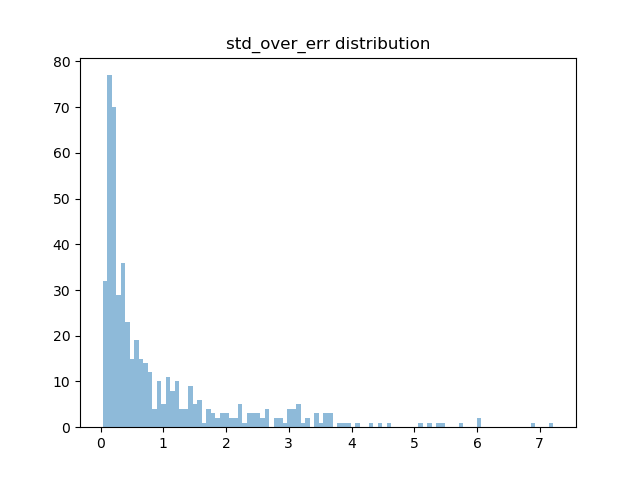

(506, 3)


In [135]:
bins = 1
feat_num = 9
dist_fig = plt.figure()
plt.hist(features[:,feat_num],bins=100,alpha=0.5)
plt.title('{} distribution'.format(feature_list[feat_num]))


print(freqs.shape)

In [123]:
np.max(features[:,9])

7.217754452665907

In [125]:
np.where(features[:,9]==np.max(features[:,9]))

(array([23]),)